In [1]:
##调整tensorflow，keras，h5py版本
!pip install tensorflow==1.14
!pip install keras==2.2.5 
!pip install 'h5py<3.0.0'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.3/109.3 MB 9.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.5/488.5 kB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 36.9 MB/s eta 0:00:0000:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.10.0
    Uninstalling tensorboard-2.10.0:
      Successfully uninstalled tensorboard-2.10.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.4
    Uninstalling tensorflow-2.6.4:
      Successfully uninstalled tensorflow-2.6.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This 

In [2]:
##原文模型定义

import keras
from keras.layers import Flatten, GlobalAveragePooling2D, GlobalMaxPooling2D, Reshape, Dense, multiply, Permute, Concatenate, Add, Activation, Lambda
from tensorflow.keras.layers import Conv2D
from keras import backend as K
from keras.activations import sigmoid

from keras import optimizers
from keras.optimizers import Adam
import keras.backend.tensorflow_backend as KTF
#import keras.backend as KTF
import glob
from keras.layers import Input,Dense,Dropout,BatchNormalization,Conv2D,MaxPooling2D,AveragePooling2D,concatenate,Activation,ZeroPadding2D
#import tensorflow as tf
import cv2
import numpy as np
import pandas as pd
import keras
from keras.models import load_model
from keras.layers import Activation, Dense
from matplotlib import pyplot as plt
from skimage import io,data
import time
from keras import layers
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

from keras.preprocessing import image
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
now = time.strftime("%Y-%m-%d_%H-%M-%S", time.localtime())



Using TensorFlow backend.
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [3]:
##全局变量声明
sampling_seed=0
size_4_training=78786
img_x=50
epochs=30
#epochs=3
batch_size = 64 
#training_reshape=(-1, img_size, img_size, 3)##全局变量声明

In [4]:
import shutil
import random
from glob import glob
from sklearn.model_selection import train_test_split
#make directory for labelling

train_dir='../working/data/train_seg/'
validation_dir='../working/data/val_seg/'
#train_dir='../working/data/train_seg/'  
#test_dir = '../working/data/test_seg/normal'  
test_dir = '../working/data/test_seg/'  
##分类收集文件名
class0 = [] # 0 = idc+
class1 = [] # 1 = idc-
imagePatches = glob('../input/breast-histopathology-images/IDC_regular_ps50_idx5/**/*.png', recursive=True)
for filename in imagePatches:
    if filename.endswith("class0.png"):
         class0.append(filename)
    elif filename.endswith("class1.png"):
        class1.append(filename)
    else:
        print(filename)

print(class0[0:10])

['../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1351_y1101_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1501_y501_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1501_y1101_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x451_y901_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x801_y451_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x151_y1051_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1351_y901_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x701_y651_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x951_y1401_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/102

In [55]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cropnet-max-pooling-no-aug/220830-cropnet-max-pooling-no-aug.h5
/kaggle/input/breast-histopathology-images/10295/0/10295_idx5_x1351_y1101_class0.png
/kaggle/input/breast-histopathology-images/10295/0/10295_idx5_x1501_y501_class0.png
/kaggle/input/breast-histopathology-images/10295/0/10295_idx5_x1501_y1101_class0.png
/kaggle/input/breast-histopathology-images/10295/0/10295_idx5_x451_y901_class0.png
/kaggle/input/breast-histopathology-images/10295/0/10295_idx5_x801_y451_class0.png
/kaggle/input/breast-histopathology-images/10295/0/10295_idx5_x151_y1051_class0.png
/kaggle/input/breast-histopathology-images/10295/0/10295_idx5_x1351_y901_class0.png
/kaggle/input/breast-histopathology-images/10295/0/10295_idx5_x701_y651_class0.png
/kaggle/input/breast-histopathology-images/10295/0/10295_idx5_x951_y1401_class0.png
/kaggle/input/breast-histopathology-images/10295/0/10295_idx5_x601_y501_class0.png
/kaggle/input/breast-histopathology-images/10295/0/10295_idx5_x701_y751_class0.png
/

KeyboardInterrupt: 

In [5]:
##添加自定义层
#import tensorflow as tf        
def focal_loss(gamma=2.):            
    def focal_loss_fixed(y_true, y_pred):
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        return -K.sum( K.pow(1. - pt_1, gamma) * K.log(pt_1)) 
    return focal_loss_fixed


def Conv2d_BN(x, nb_filter,kernel_size, strides=(1,1), padding='same',name=None):  
    if name is not None:  
        bn_name = name + '_bn'  
        conv_name = name + '_conv'  
    else:  
        bn_name = None  
        conv_name = None  
  
    x = Conv2D(nb_filter,kernel_size,padding=padding,strides=strides,activation='relu',name=conv_name)(x)  
    x = BatchNormalization(axis=3,name=bn_name)(x)  
    return x  

def Conv_Block(inpt,nb_filter,kernel_size,strides=(1,1), with_conv_shortcut=False):  
    x = Conv2d_BN(inpt,nb_filter=nb_filter[0],kernel_size=(1,1),strides=strides,padding='same')  
    x = Conv2d_BN(x, nb_filter=nb_filter[1], kernel_size=(3,3), padding='same')  
    x = Conv2d_BN(x, nb_filter=nb_filter[2], kernel_size=(1,1), padding='same')  
    if with_conv_shortcut:  
        shortcut = Conv2d_BN(inpt,nb_filter=nb_filter[2],strides=strides,kernel_size=kernel_size)  
        x = add([x,shortcut])  
        return x  
    else:  
        x = add([x,inpt])  
        return x  


def channel_attention(input_feature, ratio=8):
	
	channel_axis = 1 if K.image_data_format() == "channels_first" else -1
	channel = input_feature._keras_shape[channel_axis]
	
	shared_layer_one = Dense(channel//ratio,
							 kernel_initializer='he_normal',
							 activation = 'relu',
							 use_bias=True,
							 bias_initializer='zeros')

	shared_layer_two = Dense(channel,
							 kernel_initializer='he_normal',
							 use_bias=True,
							 bias_initializer='zeros')
	
	avg_pool = GlobalAveragePooling2D()(input_feature)    
	avg_pool = Reshape((1,1,channel))(avg_pool)
	assert avg_pool._keras_shape[1:] == (1,1,channel)
	avg_pool = shared_layer_one(avg_pool)
	assert avg_pool._keras_shape[1:] == (1,1,channel//ratio)
	avg_pool = shared_layer_two(avg_pool)
	assert avg_pool._keras_shape[1:] == (1,1,channel)
	
	max_pool = GlobalMaxPooling2D()(input_feature)
	max_pool = Reshape((1,1,channel))(max_pool)
	assert max_pool._keras_shape[1:] == (1,1,channel)
	max_pool = shared_layer_one(max_pool)
	assert max_pool._keras_shape[1:] == (1,1,channel//ratio)
	max_pool = shared_layer_two(max_pool)
	assert max_pool._keras_shape[1:] == (1,1,channel)
	
	cbam_feature = Add()([avg_pool,max_pool])
	cbam_feature = Activation('hard_sigmoid')(cbam_feature)
	
	if K.image_data_format() == "channels_first":
		cbam_feature = Permute((3, 1, 2))(cbam_feature)
	
	return multiply([input_feature, cbam_feature])


def spatial_attention(input_feature):
	kernel_size = 7
	if K.image_data_format() == "channels_first":
		channel = input_feature._keras_shape[1]
		cbam_feature = Permute((2,3,1))(input_feature)
	else:
		channel = input_feature._keras_shape[-1]
		cbam_feature = input_feature
	
	avg_pool = Lambda(lambda x: K.mean(x, axis=3, keepdims=True))(cbam_feature)
	assert avg_pool._keras_shape[-1] == 1
	max_pool = Lambda(lambda x: K.max(x, axis=3, keepdims=True))(cbam_feature)
	assert max_pool._keras_shape[-1] == 1
	concat = Concatenate(axis=3)([avg_pool, max_pool])
	assert concat._keras_shape[-1] == 2
	cbam_feature = Conv2D(filters = 1,
					kernel_size=kernel_size,
					activation = 'hard_sigmoid',
					strides=1,
					padding='same',
					kernel_initializer='he_normal',
					use_bias=False)(concat)
	assert cbam_feature._keras_shape[-1] == 1
	
	if K.image_data_format() == "channels_first":
		cbam_feature = Permute((3, 1, 2))(cbam_feature)
		
	return multiply([input_feature, cbam_feature])


def cbam_block(cbam_feature,ratio=8):
	cbam_feature = channel_attention(cbam_feature, ratio)
	cbam_feature = spatial_attention(cbam_feature, )
	return cbam_feature


IMG_SHAPE=(img_x, img_x, 3)

base_model = keras.applications.MobileNetV2(input_shape=IMG_SHAPE,include_top=False, weights='imagenet')

#weights='../working/cjd/01_rice_dete/obj_reco/checkpoint/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_img_x_no_top.h5'
base_model_layers_count=0
for layer in base_model.layers:
    #layer.trainable = False
    layer.trainable = True
    base_model_layers_count=base_model_layers_count+1
print("MobileNetV2_base_model summary:")
print("Number of layers in base_model:")
print(base_model_layers_count)
base_model.summary()
    
base_out = base_model.output
#原文中软注意力模块的组装
#--------------------Soft attention module-------------------------------------------------------------- 
ipts = base_out
residual = layers.Conv2D(1280, kernel_size = (1, 1), strides = (1, 1), padding = 'same')(ipts)
residual = layers.BatchNormalization(axis = -1)(residual)
cbam = cbam_block(residual)
base_out = layers.add([base_out, residual, cbam])
#------------------------------------------------------------------------------------------------------------ 
#fully connect 层
x = GlobalAveragePooling2D()(base_out)
#x = GlobalMaxPooling2D()(base_out)
#x = Flatten()(base_out)
#x = BatchNormalization()(x)
#x = Dense(4096,kernel_initializer='he_uniform')(x)
#x = BatchNormalization()(x)
#x = Activation('relu')(x)
#x = Dropout(0.5)(x)
#x = Dense(2096,activation="relu")(x)
#测试用后缀ANN，非必要，正式运行科不用

#开始定义分类器
# softmax
#predictions = Dense(len(ont_hot_labels[0]), activation='softmax', kernel_regularizer =regularizers.l2(0.01) )(x)  #l1_reg
classes=['idc-','idc+']
#predictions = Dense(len(classes), activation='softmax', kernel_regularizer =regularizers.l2(0.01) )(x)  #l1_reg
predictions = Dense(len(classes), activation='sigmoid', kernel_regularizer =regularizers.l2(0.01) )(x)  #l1_reg
#模型最终组装和显示整个模型
from keras.models import Model
model = Model(inputs=base_model.input, outputs=predictions)

print("Whole model summary:")
model.summary()
#模型调试，几种学习参数的组合，一般采用第一行
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=0.00001, clipnorm=1), metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adadelta(), metrics=['accuracy'])
#model.compile(optimizer=optimizers.SGD(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy']) #loss='categorical_crossentropy',
#model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adadelta(), metrics=['accuracy'])


/opt/conda/lib/python3.7/site-packages/keras_applications/mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '
2022-09-19 20:57:05.810029: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2022-09-19 20:57:05.814178: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2000165000 Hz
2022-09-19 20:57:05.814489: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55d877ca7f20 executing computations on platform Host. Devices:
2022-09-19 20:57:05.814524: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2022-09-19 20:57:05.836531: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): 

9412608/9406464 [==============================] - 1s 0us/step
MobileNetV2_base_model summary:
Number of layers in base_model:
155
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 50, 50, 3)    0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 51, 51, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 25, 25, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 25, 25, 

In [6]:
##在kaggle中建立工作目录
import os
os.makedirs('../working/data/train_seg/idc-minus/')     
os.makedirs('../working/data/train_seg/idc-plus/')  
os.makedirs('../working/data/test_seg/idc-minus/')     
os.makedirs('../working/data/test_seg/idc-plus/')  
os.makedirs('../working/data/val_seg/idc-minus/')     
os.makedirs('../working/data/val_seg/idc-plus/')  

In [7]:
#sampling 10000 images from class 0 and class 1 to train the model
##从每类文件名列表中抽样
random.seed(sampling_seed)
class0sample=random.sample(class0,size_4_training)
class0label=np.zeros(size_4_training)
class1sample=random.sample(class1,size_4_training)
class1label=np.ones(size_4_training)
##从每类样本列表中分割train-val-test
class0sample_train, class0sample_test1, class0label_train, class0label_test1 = train_test_split(class0sample, class0label, test_size=0.3, random_state=42)
class0sample_val, class0sample_test, class0label_val, class0label_test = train_test_split(class0sample_test1, class0label_test1, test_size=0.3, random_state=42)
print(len(class0sample_train))
print(len(class0sample_test))
print(len(class0sample_val))
class1sample_train, class1sample_test1, class1label_train, class1label_test1 = train_test_split(class1sample, class1label, test_size=0.3, random_state=42)
class1sample_val, class1sample_test, class1label_val, class1label_test = train_test_split(class1sample_test1, class1label_test1, test_size=0.3, random_state=42)
print(len(class1sample_train))
print(len(class1sample_test))
print(len(class1sample_val))

##函数功能：将之前文件列表中的文件复制到指定工作目录中
def read_and_save_data(path, file_name_array):
    j=0
    for i in file_name_array:
        if i.endswith('.png'):
          
            
            #second copy method
            head, tail = os.path.split(i)
            outputname=str(path+tail)
            #outputname=str(path+str(j)+'.png')
            # print(outputname)
            shutil.copy(i, outputname)
   
            #print(status2)
            
            j=j+1
            if j==120000:
                break
            
##分别按照每类，train， validation， test保存样本
class0train_path='../working/data/train_seg/idc-minus/'
class1train_path='../working/data/train_seg/idc-plus/'
class0test_path='../working/data/test_seg/idc-minus/'
class1test_path='../working/data/test_seg/idc-plus/'
class0val_path='../working/data/val_seg/idc-minus/'
class1val_path='../working/data/val_seg/idc-plus/'

read_and_save_data(class0train_path,class0sample_train)
read_and_save_data(class1train_path,class1sample_train)


read_and_save_data(class0test_path,class0sample_test)
read_and_save_data(class1test_path,class1sample_test)


read_and_save_data(class0val_path,class0sample_val)
read_and_save_data(class1val_path,class1sample_val)
##print输出包含两类train，valid，test的大小和每次转存的文件用于检查

55150
7091
16545
55150
7091
16545


In [8]:
##这个模块（cell）把之前存好的每类train-valid-test文件分别读到np。array里
##这个模块在其他模型上进行过测试，也没有问题

import os
import cv2

##函数功能，将指定目录path下的文件读到列表中，并按给定的tag创建
#输入path目标目录，tag目录内所有文件的label（目录内全部一致）
#输出image_data，进行过resize的图片数据array
#输出label，标签列表，列表内每一个数字都是tag，列表大小等于目录内图片数量
def readImage(path, tag):
    j=0
    image_data = []
    label=[]
    for i in os.listdir(path):
        imgname=path+i
        #print(imgname)
        img = cv2.imread(imgname, cv2.IMREAD_COLOR)
        img_resized = cv2.resize(img, (img_x,img_x), interpolation=cv2.INTER_LINEAR)
        image_data.append(img_resized)
        label.append(tag)
        #print(img[1])
        j=j+1
        #if j==10:
        #    break
        
    return image_data, label

import numpy as np
from tensorflow.keras.utils import *
from sklearn.utils import shuffle

class0_train, train0_label = readImage(class0train_path, 0)
class1_train, train1_label  = readImage(class1train_path, 1)
class0_test, test0_label = readImage(class0test_path, 0)
class1_test, test1_label = readImage(class1test_path, 1)
class0_val, val0_label = readImage(class0val_path, 0)
class1_val, val1_label = readImage(class1val_path, 1)


##函数功能，将每类train的图片数据列表和标签列表进行混合并洗牌，或者是validation，或者是test
#class0array，class1array，是train（或valid，或test） 中class0，class1的图片数据列表，label0，label1是标签列表，比如说class0是一个（700，224，224，3）的数据array，700就是图片张数，224是xy尺寸，3是三原色对应的通道。label0就是长度为700，每位都是0的array
#输出中combined_data, combined_label分别是混合并洗牌后的数据和标签。混合通过np。concatenate，洗牌通过shuffle函数，并且combined_label标签进行了hot-coded二进制转换,通过to_categorical函数实现
#函数中包含print检查功能，先显示combined_label的array 的shape，再整个print combined_label，以检查label是否成功二进制化，是否完全平衡
#输出label，标签列表，列表内每一个数字都是tag，列表大小等于目录内图片数量
def Image_array_process(class0array,label0, class1array, label1):
    class0_array=np.array(class0array)
    class1_array=np.array(class1array)
    combined_data = np.concatenate((class0_array, class1_array))
    # combined_label= np.concatenate((label0,label1), axis=0)
    combined_label= np.concatenate((label0,label1))
    assert len(combined_data) == len(combined_label)
    combined_data, combined_label = shuffle(combined_data, combined_label, random_state=0)
    print(combined_data.shape)
    length=len(combined_data) 
    combined_label=to_categorical(combined_label,num_classes=2)
    #i=0
    #for i in range(10):
    #    print(combined_label[i])

    # print

    #print(class0_array.shape)
    #print(combined_data.shape)
    '''
    training_reshape=(img_x,img_x,3)
    length=len(combined_data)
    print(length)
    x =[None]*length
    #print(img_data.type)
    y =np.zeros(length)
    i=0
   
    for features,label in combined_data:
        x[i]=features
        #print(x.shape)
        y[i]=label
        #print(y[i])
        i=i+1
    
            #x = np.array(x).reshape(training_reshape)
    x = np.array(x)    
    #print(x.shape)
    #y=np.array(y)
    y=y.astype(int)
    y = to_categorical(y)
    print(y)
    '''  
    return combined_data, combined_label

##分别把train，valid，test中0，1两类的数据和标签的array混合洗牌
X_train, y_train=Image_array_process(class0_train, train0_label, class1_train, train1_label)
X_test, y_test=Image_array_process(class0_test, test0_label, class1_test, test1_label)
X_val, y_val=Image_array_process(class0_val, val0_label, class1_val, val1_label)


(110300, 50, 50, 3)
(14182, 50, 50, 3)
(33090, 50, 50, 3)


In [9]:
#这个模块做一个变量赋值，把train，valid，test的data和标签（X_trian，y_train等）复制给新变量，以方便后面的使用，原来的变量变为备份变量
train_data=X_train
train_label=y_train

test_data=X_test
test_label=y_test

val_data=X_val
val_label=y_val

In [10]:
IMG_SHAPE=(img_x, img_x, 3)

train_datagen = ImageDataGenerator(rescale = 1.0/255,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1,
                                  fill_mode = 'constant',
                                  zoom_range = 0.1,
                                  rotation_range = 20
                                  )

#train_datagen.mean = np.array([103.939, 116.779, 123.68], dtype=np.int64).reshape((3, 1, 1))  # remove imagenet BGR mean value
#train_generator = train_datagen.flow(train_data, train_label, target_size=img_size, classes=classes)
train_generator = train_datagen.flow(train_data, train_label)

validation_datagen = ImageDataGenerator(rescale = 1.0/255)
#validation_datagen.mean = np.array([103.939, 116.779, 123.68], dtype=np.int64).reshape((3, 1, 1))
test_dir = '../working/data/test_seg/'  
#val_generator = validation_datagen.flow(test_data, test_label, target_size=img_size, classes=classes)
val_generator = validation_datagen.flow(test_data, test_label)

val2_datagen = ImageDataGenerator(rescale = 1.0/255)
#val2_datagen.mean = np.array([103.939, 116.779, 123.68], dtype=np.int64).reshape((3, 1, 1))
test_dir = '../working/data/test_seg/'  
#val2_generator = val2_datagen.flow(val_data, val_label, target_size=img_size, classes=classes)
val2_generator = val2_datagen.flow(val_data, val_label)

In [11]:
nb_train_samples = len(train_data)
nb_val_samples = len(val_data)

In [12]:
os.makedirs('../working/log/')

In [13]:
os.chdir("/kaggle/working/")
!ls

__notebook_source__.ipynb  data  log


In [14]:
#import os
os.chdir("/kaggle/working/log")
print(os.getcwd())
print(os.listdir("/kaggle/working/log"))
from IPython.display import FileLink
FileLink('finetuning_model.h5')

/kaggle/working/log
[]


/kaggle/working/log/finetuning_model.h5

In [18]:
import tensorflow as tf
from keras.callbacks import EarlyStopping

MODEL_INIT = '/kaggle/working/log/init_model.h5'
MODEL_PATH = '/kaggle/working/log/tst_model.h5'
MODEL_PATH2= '../input/cropnet-max-pooling-no-aug/220830-cropnet-max-pooling-no-aug.h5'
now = time.strftime("%Y-%m-%d_%H-%M-%S", time.localtime())
board_name1 = './working/stage1/' + now + '/'

#model_checkpoint1 = ModelCheckpoint(filepath=MODEL_INIT, monitor='val_accuracy')
#model_checkpoint1 = ModelCheckpoint(filepath=MODEL_INIT, monitor='val_accuracy', mode='max')
#model_checkpoint1 = ModelCheckpoint(filepath=MODEL_INIT, monitor='val_acc', mode='max')
model_checkpoint1 = ModelCheckpoint(filepath=MODEL_INIT, monitor='val_loss', mode='min')
board1 = TensorBoard(log_dir=board_name1,
                     histogram_freq=0,
                     write_graph=True,
                     write_images=True)
callback_list1 = [model_checkpoint1, board1, EarlyStopping(monitor='val_loss', patience=5)]

#history1=model.fit_generator(train_generator, steps_per_epoch=nb_train_samples / float(batch_size),
#                           epochs = 1,
#                           validation_steps=nb_val_samples / float(batch_size),
#                           validation_data=val_generator,
#                           callbacks=callback_list1, verbose=1)

Epoch 1/1
  27/1723 [..............................] - ETA: 31:54 - loss: 0.9666 - acc: 0.5023

KeyboardInterrupt: 

In [72]:
from keras.models import load_model

model1 = load_model('/kaggle/input/cropnet-avg-pooling-no-aug/220830 cropnet average pooling no aug.h5', compile=False)

roc analysis of validation dataset


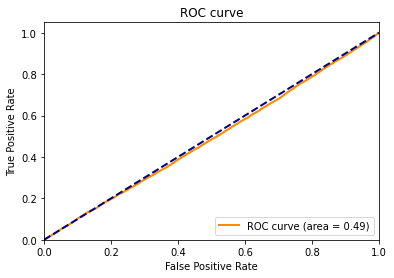

auc value
0.4901455932020887


In [73]:
print("roc analysis of validation dataset")
#y_score = model1.predict_proba(test_label)
y_score = model1.predict_generator(val2_generator)
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Learn to predict each class against the other


n_classes = 2 # number of class




# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(val_label[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(val_label.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# The process of drawing a roc-auc curve belonging to a specific class

plt.figure()
lw = 2 # line_width
no_class=1
plt.plot(fpr[no_class], tpr[no_class], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[no_class]) # Drawing Curve according to 1. class 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()
roc_auc = auc(fpr[no_class], tpr[no_class])
print("auc value")
print(roc_auc)

roc analysis of val dataset
[0 1 0 ... 1 1 0]
[[9.8974717e-01 1.2838542e-02]
 [1.0302156e-02 9.9619317e-01]
 [2.6608187e-01 5.5043948e-01]
 ...
 [5.1448822e-02 9.9797100e-01]
 [1.5388091e-01 9.9884039e-01]
 [9.9991214e-01 7.7969517e-04]]
[1.02528334e-02 9.96193171e-01 7.33918130e-01 ... 9.97970998e-01
 9.98840392e-01 8.78572464e-05]


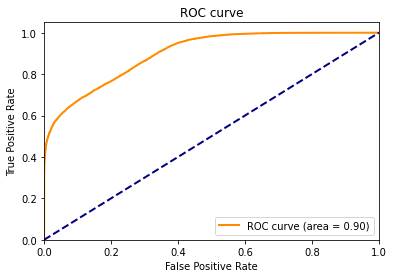

auc value
0.8987677936515895


In [74]:
print("roc analysis of val dataset")
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

test_labels = np.concatenate([np.argmax(val2_generator[i][1], axis=1) for i in range(len(val2_generator))])
print(test_labels)

#y_score = model1.predict_generator(val2_generator)
print(y_score)

y_predict_score = []
for i in range(len(test_labels)):
    if test_labels[i] == 0:
        y_predict_score.append(1 - y_score[i][0])
    if test_labels[i] == 1:
        y_predict_score.append(y_score[i][1])
        
y_predict_score = np.array(y_predict_score)
print(y_predict_score)

fpr,tpr, thresholds = roc_curve(test_labels, y_predict_score )   
# 这个地方可以按照原来代码里加marco与micro参数

auc_score = auc(fpr,tpr)
 
plt.figure()
lw = 2 # line_width
plt.plot(fpr,tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_score)
 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

print("auc value")
print(auc_score)


roc analysis of val dataset
[0 1 0 ... 1 1 0]
[[9.8974717e-01 1.2838542e-02]
 [1.0302156e-02 9.9619317e-01]
 [2.6608187e-01 5.5043948e-01]
 ...
 [5.1448822e-02 9.9797100e-01]
 [1.5388091e-01 9.9884039e-01]
 [9.9991214e-01 7.7969517e-04]]
[1.28054023e-02 9.89764273e-01 6.74127489e-01 ... 9.50973988e-01
 8.66506398e-01 7.79211521e-04]


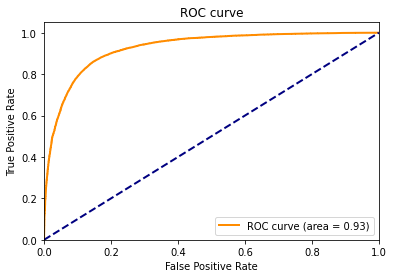

auc value
0.9264076772223269


In [75]:
print("roc analysis of val dataset")
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

test_labels = np.concatenate([np.argmax(val2_generator[i][1], axis=1) for i in range(len(val2_generator))])
print(test_labels)

#y_score = model1.predict_generator(val2_generator)
print(y_score)

y_predict_score = []
y_score_normalise=np.zeros((len(test_labels),n_classes))
for i in range(len(test_labels)):
    y_score_normalise1=y_score[i][1]/(y_score[i][0]+y_score[i][1])*1.0
    y_score_normalise0=y_score[i][0]/(y_score[i][0]+y_score[i][1])*1.0
    if test_labels[i] == 0:
        y_predict_score.append(1 - y_score_normalise0)
    if test_labels[i] == 1:
        y_predict_score.append(y_score_normalise1)
    y_score_normalise[i][0]=y_score_normalise0
    y_score_normalise[i][1]=y_score_normalise1
y_predict_score = np.array(y_predict_score)
y_score_normalise = np.array(y_score_normalise)
print(y_predict_score)

fpr,tpr, thresholds = roc_curve(test_labels, y_predict_score )   
# 这个地方可以按照原来代码里加marco与micro参数

auc_score = auc(fpr,tpr)
 
plt.figure()
lw = 2 # line_width
plt.plot(fpr,tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_score)
 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

print("auc value")
print(auc_score)


roc analysis of val dataset
[0 1 0 ... 1 1 0]
[[9.8974717e-01 1.2838542e-02]
 [1.0302156e-02 9.9619317e-01]
 [2.6608187e-01 5.5043948e-01]
 ...
 [5.1448822e-02 9.9797100e-01]
 [1.5388091e-01 9.9884039e-01]
 [9.9991214e-01 7.7969517e-04]]
[1.28054321e-02 9.89764273e-01 6.74127460e-01 ... 9.50973988e-01
 8.66506398e-01 7.79156049e-04]


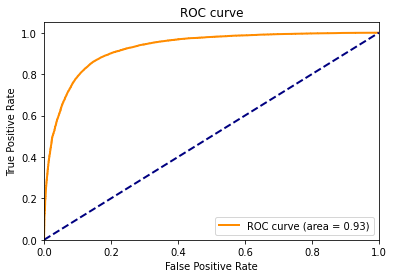

auc value
0.9264076717426148


In [76]:
print("roc analysis of val dataset")
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

test_labels = np.concatenate([np.argmax(val2_generator[i][1], axis=1) for i in range(len(val2_generator))])
print(test_labels)

#y_score = model1.predict_generator(val2_generator)
print(y_score)

y_predict_score = []
#y_score_normalise=np.zeros(len(test_labels),n_classes)
for i in range(len(test_labels)):
    y_score_normalise1=y_score[i][1]/(y_score[i][0]+y_score[i][1])*1.0
    y_score_normalise0=y_score[i][0]/(y_score[i][0]+y_score[i][1])*1.0
    if test_labels[i] == 0:
        y_predict_score.append(y_score_normalise1)
    if test_labels[i] == 1:
        y_predict_score.append(y_score_normalise1)
    y_score_normalise[i][0]=y_score_normalise0
    y_score_normalise[i][1]=y_score_normalise1
y_predict_score = np.array(y_predict_score)
#y_score_normalise = np.array(y_score_normalise)
print(y_predict_score)

fpr,tpr, thresholds = roc_curve(test_labels, y_predict_score )   
# 这个地方可以按照原来代码里加marco与micro参数

auc_score = auc(fpr,tpr)
 
plt.figure()
lw = 2 # line_width
plt.plot(fpr,tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_score)
 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

print("auc value")
print(auc_score)


In [77]:
model.evaluate_generator(val2_generator)

KeyboardInterrupt: 

In [ ]:
model.evaluate_generator(val_generator)

In [ ]:
model.evaluate_generator(train_generator)

In [ ]:
model.metrics_names

#model_checkpoint2 = ModelCheckpoint(filepath=MODEL_PATH,  monitor='val_accuracy')
model_checkpoint2 =ModelCheckpoint(filepath=MODEL_PATH, monitor='val_loss', mode='min')
#model_checkpoint2 =ModelCheckpoint(filepath=MODEL_PATH, monitor='val_acc', mode='max')
board_name2 = '/kaggle/working/stage2/' + now + '/'
board2 = TensorBoard(log_dir=board_name2,
                     histogram_freq=0,
                     write_graph=True,
                     write_images=True)
callback_list2 = [model_checkpoint2, board2, EarlyStopping(monitor='val_loss', patience=5)]


model.load_weights(MODEL_INIT)
for model1 in model.layers:
    model1.trainable = True
    
model.compile(optimizer=optimizers.Adam(lr=0.00001, clipnorm=1), loss = [focal_loss(gamma=2)], metrics=['accuracy'])

history2=model.fit_generator(train_generator, steps_per_epoch=nb_train_samples / float(batch_size), epochs=epochs, 
validation_steps=nb_val_samples / float(batch_size), validation_data=val_generator, callbacks=callback_list2, verbose=1)

model.evaluate_generator(train_generator)

model.evaluate_generator(val2_generator)

model.evaluate_generator(val_generator, verbose=1)

##作图显示第二次训练中accuracy和lost的变化
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (12, 6))
plt.subplot(121)
#plotting the Accuracy of test and training sets
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('2nd training Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(122)
#plotting the loss of test and training sets
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('2nd training Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

import sklearn
from sklearn.metrics import f1_score, roc_auc_score, cohen_kappa_score, precision_score, recall_score, accuracy_score, confusion_matrix
# model是最新版本的mode（stage 2）
# 混淆矩阵
from keras.models import load_model

model2 = load_model(MODEL_PATH, compile=False)
print("analyse of final model")


cf_matrix_val = confusion_matrix(
    np.concatenate([np.argmax(val2_generator[i][1], axis=1) for i in range(len(val2_generator))]),    
    np.argmax(model2.predict_generator(val2_generator, steps=len(val2_generator)), axis=1) 
)

plt.figure(figsize = (12, 6))
sns.heatmap(cf_matrix_val, annot=True, cmap='Blues')
plt.title("VAL Confusion matrix")
# kappa VAL
kappa_val = cohen_kappa_score(
    np.concatenate([np.argmax(val2_generator[i][1], axis=1) for i in range(len(val2_generator))]),    
    np.argmax(model2.predict_generator(val2_generator, steps=len(val2_generator)), axis=1) 
)
print("VAL kappa")
print(kappa_val)



print("analyse 1st model")
print("report of val data")
report = sklearn.metrics.classification_report(
    np.concatenate([np.argmax(val2_generator[i][1], axis=1) for i in range(len(val2_generator))]),    
    np.argmax(model2.predict_generator(val2_generator, steps=len(val2_generator)), axis=1) 
)
print(report)

cf_matrix_test = confusion_matrix(
    np.concatenate([np.argmax(val_generator[i][1], axis=1) for i in range(len(val_generator))]),    
    np.argmax(model2.predict_generator(val_generator, steps=len(val_generator)), axis=1) 
)

plt.figure(figsize = (12, 6))
sns.heatmap(cf_matrix_test, annot=True, cmap='Blues')
plt.title("Test Confusion matrix")



print("report of test data")
import sklearn

report = sklearn.metrics.classification_report(
    np.concatenate([np.argmax(val_generator[i][1], axis=1) for i in range(len(val_generator))]),    
    np.argmax(model2.predict_generator(val_generator, steps=len(val_generator)), axis=1) 
)
print(report)


# kappa TEST
kappa_test = cohen_kappa_score(
    np.concatenate([np.argmax(val_generator[i][1], axis=1) for i in range(len(val_generator))]),    
    np.argmax(model2.predict_generator(val_generator, steps=len(val_generator)), axis=1) 
)
print("TEST kappa")
print(kappa_test)